<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inspecting-Spearman's-rank-correlation-coefficient" data-toc-modified-id="Inspecting-Spearman's-rank-correlation-coefficient-1">Inspecting Spearman's rank correlation coefficient</a></span><ul class="toc-item"><li><span><a href="#Discover-the-strength-of-monotonic-relation-Part-2" data-toc-modified-id="Discover-the-strength-of-monotonic-relation-Part-2-1.1">Discover the strength of monotonic relation Part 2</a></span></li><li><span><a href="#spearmanr-requires-ranked-data" data-toc-modified-id="spearmanr-requires-ranked-data-1.2">spearmanr requires ranked data</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Spearman's-Rank-Correlation-with--identical-values" data-toc-modified-id="Spearman's-Rank-Correlation-with--identical-values-3">Spearman's Rank Correlation with  identical values</a></span></li><li><span><a href="#Pandas-corr" data-toc-modified-id="Pandas-corr-4">Pandas corr</a></span></li><li><span><a href="#Finding-manually-using-the-formula" data-toc-modified-id="Finding-manually-using-the-formula-5">Finding manually using the formula</a></span><ul class="toc-item"><li><span><a href="#Ranking-data" data-toc-modified-id="Ranking-data-5.1">Ranking data</a></span></li><li><span><a href="#Finding-covariance-with-numpy" data-toc-modified-id="Finding-covariance-with-numpy-5.2">Finding covariance with numpy</a></span></li><li><span><a href="#Finding-covariance-with-Pandas" data-toc-modified-id="Finding-covariance-with-Pandas-5.3">Finding covariance with Pandas</a></span></li><li><span><a href="#Finding-standard-deviations-with-numpy" data-toc-modified-id="Finding-standard-deviations-with-numpy-5.4">Finding standard deviations with numpy</a></span></li><li><span><a href="#Finding-standard-deviations-with-Pandas" data-toc-modified-id="Finding-standard-deviations-with-Pandas-5.5">Finding standard deviations with Pandas</a></span></li></ul></li><li><span><a href="#ddof-in-Pandas-and-Numpy-are-different" data-toc-modified-id="ddof-in-Pandas-and-Numpy-are-different-6">ddof in Pandas and Numpy are different</a></span></li><li><span><a href="#Comparing-Pearson-and-Spearman" data-toc-modified-id="Comparing-Pearson-and-Spearman-7">Comparing Pearson and Spearman</a></span><ul class="toc-item"><li><span><a href="#Linear-relation" data-toc-modified-id="Linear-relation-7.1">Linear relation</a></span></li><li><span><a href="#Investigating-quadratic" data-toc-modified-id="Investigating-quadratic-7.2">Investigating quadratic</a></span></li><li><span><a href="#Investigating-cubic-function" data-toc-modified-id="Investigating-cubic-function-7.3">Investigating cubic function</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8">Conclusion</a></span></li></ul></div>

# Inspecting Spearman's rank correlation coefficient 

## Discover the strength of monotonic relation Part 2

## spearmanr requires ranked data




# Introduction

In the last article, I wrote about Spearman's rank correlation coefficient using ordinal data. I explored it by using four different methods, simplified, general formula, Pandas `corr` and manual calculation.

[Link](https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046)

In this article, I'd like to explore the Spearman's rank correlation coefficient using data that includes identical values. I also compare difference between the Spearman and Pearson vaules.

In the [`scipy.stats.spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) document, using ordinal data is not explicitly stated. I'd like to dig about it as well.


# Spearman's Rank Correlation with  identical values

The general formula of Spearman's rank correlation is the following. When you have data with identical ranks, you have to use this formula rather than the simplified formula.

$$
\begin{align}
\rho_{r_x,r_y}= \frac{cov(r_x,r_y)}{\sigma _{rx} \sigma _{ry}} \tag{1-1}
\end{align}
$$

where <br>
$cov(r_x,r_y)$: the covariance of ranked data $r_x$ and $r_y$.<br> 
$\sigma_{rx}$ and $\sigma_{ry}$ are the standard deviations of $r_x$ and $r_y$.


Let's import necessary libraries.

In [ ]:
# https://gist.github.com/e2ac6a136d7b61298dd5102a8bcab616

In [4]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [5]:
# https://gist.github.com/shinokada/2a67199e68bc08535d6eb278fde199ac

correlation=0.710560, p-value=0.073530


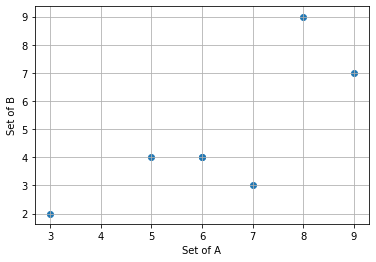

In [6]:
fig, ax = plt.subplots()

df = pd.DataFrame(
    [
        [7,3],
        [6,4],
        [5,4],
        [3,2],
        [6,4],
        [8,9],
        [9,7]
    ],
    columns=['Set of A','Set of B'])

correlation, pval = spearmanr(df)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
ax.scatter(df.iloc[:,0],df.iloc[:,1])
ax.set_xlabel('Set of A')
ax.set_ylabel('Set of B')
ax.grid(True)
plt.show()

# Pandas corr

[Pandas corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) requires to set the method. We use `spearman` for the method. It returns the correlation matrix, so we need to select `[0,1]`.

In [ ]:
# https://gist.github.com/5d24491e74d2cdb96a227076cf013ccd

In [8]:
df.corr(method='spearman')

,Set of A,Set of B
Set of A,1.00000,0.71056
Set of B,0.71056,1.00000


# Finding manually using the formula

$$
\begin{align}
\rho_{r_x,r_y}= \frac{cov(r_x,r_y)}{\sigma _{rx} \sigma _{ry}} \tag{1-1}
\end{align}
$$

The formula requires covariance of $r_x$ and $r_y$, standard deviations of $\sigma _{rx}, \sigma _{ry}$.

## Ranking data

We need to rank the data using `scipy.stats.rankdata`.

In [ ]:
# https://gist.github.com/a3d9bcd264d27fd57d2d1c57babf0d7a

In [10]:
from scipy.stats import rankdata

r_x=rankdata(df.iloc[:,0])
print(r_x)
r_y=rankdata(df.iloc[:,1])
print(r_y)

[5.  3.5 2.  1.  3.5 6.  7. ]
[2. 4. 4. 1. 4. 7. 6.]


Set A|Set B|Rank Set A|Rank Set B
:-:|:-:|:-:|:-:
7|3|5|2
6|4|3.5|4
5|4|2|4
3|2|1|1
6|4|3.5|4
8|9|6|7
9|7|7|6

In Set A, there are two 6s and their ranks are 3rd and 4th.

$$
\frac{3+4}{2}=3.5
$$

In Set B, there are three 4s and their ranks are 3rd, 4th and 5th. Therefor their ranks are:

$$
\frac{3+4+5}{3}=4
$$

## Finding covariance with numpy

In [27]:
np.cov(r_x,r_y,ddof=0)

array([[3.92857143, 2.71428571],
       [2.71428571, 3.71428571]])

In [38]:
cov_n0=np.cov(r_x,r_y,ddof=0)[0][1]
cov_n1=np.cov(r_x,r_y,ddof=1)[0][1]
print(cov_n0)
print(cov_n1)

2.714285714285714
3.1666666666666665


## Finding covariance with Pandas

In [40]:
df = pd.DataFrame({'Rank Set A':r_x, 'Rank Set B':r_y})
df.cov().iloc[0,1]

3.1666666666666665

Interestingly Pandas covariance returns the same value with Numpy when the ddof has value1. Numpy's cov ddof=1 will return the unbiased estimate and ddof=0 will return the simple average.

## Finding standard deviations with numpy

In [47]:
s_x=np.std(r_x)
s_y=np.std(r_y)
s_x0=np.std(r_x,ddof=0)
s_y0=np.std(r_y,ddof=0)
s_x1=np.std(r_x,ddof=1)
s_y1=np.std(r_y,ddof=1)

print(f'Numpy std default: {s_x}')
print(f'Numpy std default: {s_y}')
print(f'Numpy std ddof=0: {s_x0}')
print(f'Numpy std ddof=0: {s_y0}')
print(f'Numpy std ddof=1: {s_x1}')
print(f'Numpy std ddof=1: {s_y1}')

Numpy std default: 1.9820624179302297
Numpy std default: 1.927248223318863
Numpy std ddof=0: 1.9820624179302297
Numpy std ddof=0: 1.927248223318863
Numpy std ddof=1: 2.140872096444188
Numpy std ddof=1: 2.0816659994661326


In [42]:
cov_n/(s_x*s_y)

0.828986331140832

## Finding standard deviations with Pandas


In [49]:
print(f'Pandas std default: {df.std()}')
print(f'Pandas std ddof=0: {df.std(ddof=0)}')
print(f'Pandas std ddof=1: {df.std(ddof=1)}')

Pandas std default: Rank Set A    2.140872
Rank Set B    2.081666
dtype: float64
Pandas std ddof=0: Rank Set A    1.982062
Rank Set B    1.927248
dtype: float64
Pandas std ddof=1: Rank Set A    2.140872
Rank Set B    2.081666
dtype: float64


# ddof in Pandas and Numpy are different


When you find the variance and standard deviation, Numpy and Pandas' default `ddof` are different.



# Comparing Pearson and Spearman


## Linear relation

In [11]:
%%bash
gist -P -f spearman2_2.py -d "ranked data"

https://gist.github.com/a3d9bcd264d27fd57d2d1c57babf0d7a


1.0
0.9999999999999999


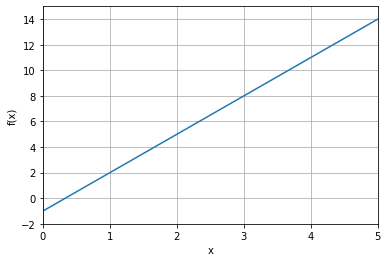

In [52]:
x1=np.arange(0,5,0.01)
fx1=np.poly1d([3,-1]) # 3x-1

spearmancor, pval = spearmanr(x1,fx1(x1))
print(spearmancor)
pearsoncor,pval = pearsonr(x1,fx1(x1))
print(pearsoncor)

fig, ax = plt.subplots()
x_plot=np.linspace(0,5,100)
ax.plot(x_plot,fx1(x_plot))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim(0,5)
ax.set_ylim(-2,15)
ax.grid(True)
plt.show()

For a linear function, the Spearman and Pearson are the same value.

## Investigating quadratic 


x|f(x)
:-:|:-:
1|1
2|4
3|9
4|16
5|25
6|36

1.0
0.9833690525971426


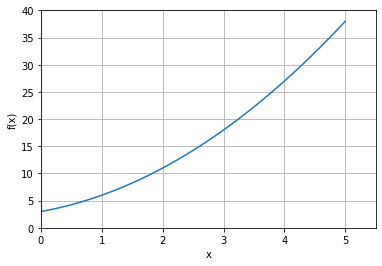

In [42]:
x2=np.arange(0,5,0.01)
fx2=np.poly1d([1,2,3]) # x^2+2x+3

spearmancor, pval = spearmanr(x2,fx2(x2))
print(spearmancor)
pearsoncor,pval = pearsonr(x2,fx2(x2))
print(pearsoncor)

fig, ax = plt.subplots()
x_plot=np.linspace(0,5,100)
ax.plot(x_plot,fx2(x_plot))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim(0,5.5)
ax.set_ylim(0,40)
ax.grid(True)
plt.show()

While x increases f(x) increases and the Spearman value is 1. However even we use the same function, but using different domain,the Spearman value decrease. It is because values of f(x) decreases when x values increase. 

0.48511548511548513
0.6104541477467882


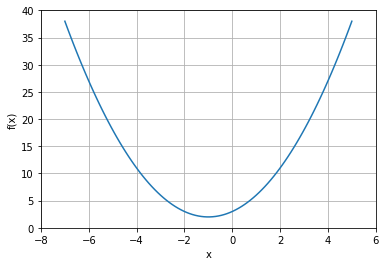

In [49]:
x2=np.arange(-5,5,0.01)
fx2=np.poly1d([1,2,3]) # x^2+2x+3

spearmancor, pval = spearmanr(x2,fx2(x2))
print(spearmancor)
pearsoncor,pval = pearsonr(x2,fx2(x2))
print(pearsoncor)

fig, ax = plt.subplots()
x_plot=np.linspace(-7,5,100)
ax.plot(x_plot,fx2(x_plot))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xlim(-8,6)
ax.set_ylim(0,40)
ax.grid(True)
plt.show()

## Investigating cubic function

0.9144132575042309
0.8176029571135436


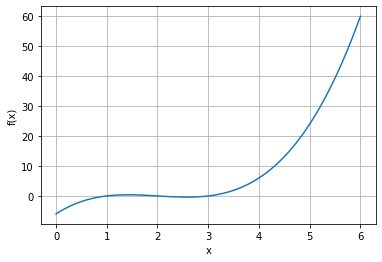

In [54]:
x3=np.arange(0,6,0.01)
fx3=np.poly1d([1,2,3],True) #(x-1)(x-2)(x-3)
spearmancor, pval = spearmanr(x3,fx3(x3))
print(spearmancor)
pearsoncor,pval = pearsonr(x3,fx3(x3))
print(pearsoncor)

fig, ax = plt.subplots()
x_plot=np.linspace(0,6,100)
ax.plot(x_plot,fx3(x_plot))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
plt.show()

Sinc the above cubic function has decreased values in the domain, the Spearman values is not 1. If you limit the domain to the value where the function increases, the Spearman will be 1.

1.0
0.9849816814186138


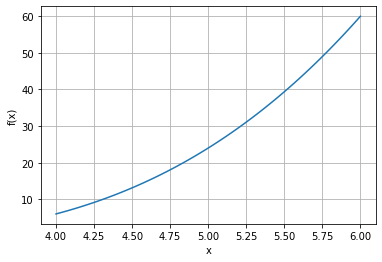

In [55]:
x3=np.arange(4,6,0.01)
fx3=np.poly1d([1,2,3],True) #(x-1)(x-2)(x-3)
spearmancor, pval = spearmanr(x3,fx3(x3))
print(spearmancor)
pearsoncor,pval = pearsonr(x3,fx3(x3))
print(pearsoncor)

fig, ax = plt.subplots()
x_plot=np.linspace(4,6,100)
ax.plot(x_plot,fx3(x_plot))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
plt.show()

Not using ordinal 

# Conclusion

- spearmanr requires ranked data so your data is required to be ordinal.Generally your data is not ordinal, so it is a good practice using `scipy.stats.rankdata` when you are finding the Spearman. 
- It is also recommended to plot a graph to see any values are decreasing since it will affect your Spearman value.
